In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('hotel_bookings.csv')
print(dataset.shape)
dataset.head()

(119390, 32)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [3]:
dataset.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [4]:
list(dataset.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date']

In [5]:
country_code = pd.read_csv('countries_codes.csv')
print(country_code.shape)
country_code.head()

(256, 6)


,Country,Alpha-2 code,Alpha-3 code,Numeric code,Latitude (average),Longitude (average)
0,Afghanistan,"""AF""","""AFG""","""4""","""33""","""65"""
1,Albania,"""AL""","""ALB""","""8""","""41""","""20"""
2,Algeria,"""DZ""","""DZA""","""12""","""28""","""3"""
3,American Samoa,"""AS""","""ASM""","""16""","""-14.3333""","""-170"""
4,Andorra,"""AD""","""AND""","""20""","""42.5""","""1.6"""


In [6]:
country_code1 = country_code[['Country','Alpha-3 code']].copy()
country_code1['Alpha-3 code'] = country_code1['Alpha-3 code'].str[2:-1]
country_code1.head()

,Country,Alpha-3 code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,American Samoa,ASM
4,Andorra,AND


In [7]:
dataset.rename(columns={'country':'country_code'}, inplace=True)

In [8]:
new_row = pd.DataFrame({'Country':['China', 'East Timor'],
                        'Alpha-3 code':['CN','TMP']})
print(country_code1.shape)
country_code1 = pd.concat([country_code1,new_row], ignore_index=True)
print(country_code1.shape)

(256, 2)
(258, 2)


In [9]:
merged_df = dataset.merge(country_code1, how='left', left_on=['country_code'], right_on=['Alpha-3 code'])
print(merged_df.shape)
merged_df.head()

(120265, 34)


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,Alpha-3 code
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,PRT
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,PRT
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,GBR
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,GBR
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom,GBR


In [10]:
list(merged_df.columns)

['hotel',
 'is_canceled',
 'lead_time',
 'arrival_date_year',
 'arrival_date_month',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'meal',
 'country_code',
 'market_segment',
 'distribution_channel',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_canceled',
 'reserved_room_type',
 'assigned_room_type',
 'booking_changes',
 'deposit_type',
 'agent',
 'company',
 'days_in_waiting_list',
 'customer_type',
 'adr',
 'required_car_parking_spaces',
 'total_of_special_requests',
 'reservation_status',
 'reservation_status_date',
 'Country',
 'Alpha-3 code']

In [11]:
merged_df.drop(['Alpha-3 code'], axis=1, inplace=True)

In [12]:
merged_df.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country_code                         488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16416
company         

In [13]:
merged_df.dtypes

hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country_code                       object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent                             

# EDA

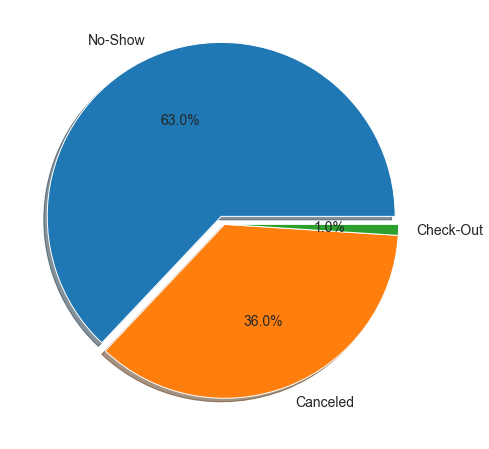

In [57]:
plt.figure(figsize=(10,8))
plt.pie(merged_df.reservation_status.value_counts(),
        labels=list(set(merged_df.reservation_status)), 
        explode=(0.05,0,0), 
        autopct=lambda p:f'{p:.1f}%', textprops={'fontsize': 14}, 
        shadow=True)
plt.show()

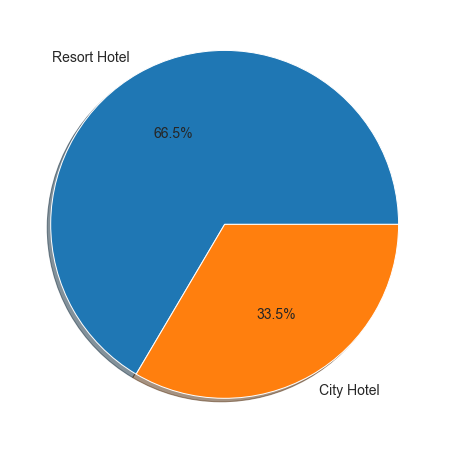

In [58]:
plt.figure(figsize=(10,8))
plt.pie(merged_df.hotel.value_counts(),
        labels=list(set(merged_df.hotel)),
        autopct=lambda p:f'{p:.1f}%', textprops={'fontsize': 14},
        shadow=True)
plt.show()

In [15]:
done_df = merged_df.loc[merged_df['reservation_status']=='Check-Out']
done_df.shape

(75717, 33)

In [16]:
done_df['reservation_status_date'] = pd.to_datetime(done_df['reservation_status_date'])
done_df.dtypes

C:\Users\Brian\AppData\Local\Temp/ipykernel_1172/948564761.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done_df['reservation_status_date'] = pd.to_datetime(done_df['reservation_status_date'])


hotel                                     object
is_canceled                                int64
lead_time                                  int64
arrival_date_year                          int64
arrival_date_month                        object
arrival_date_week_number                   int64
arrival_date_day_of_month                  int64
stays_in_weekend_nights                    int64
stays_in_week_nights                       int64
adults                                     int64
children                                 float64
babies                                     int64
meal                                      object
country_code                              object
market_segment                            object
distribution_channel                      object
is_repeated_guest                          int64
previous_cancellations                     int64
previous_bookings_not_canceled             int64
reserved_room_type                        object
assigned_room_type  

In [18]:
done_df['checkin_date'] = done_df.arrival_date_year.astype(str)+'-'+done_df.arrival_date_month.astype(str)+'-'+done_df.arrival_date_day_of_month.astype(str)
done_df['checkin_date'][:5]

C:\Users\Brian\AppData\Local\Temp/ipykernel_1172/2559600223.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done_df['checkin_date'] = done_df.arrival_date_year.astype(str)+'-'+done_df.arrival_date_month.astype(str)+'-'+done_df.arrival_date_day_of_month.astype(str)


0    2015-July-1
1    2015-July-1
2    2015-July-1
3    2015-July-1
4    2015-July-1
Name: checkin_date, dtype: object

In [19]:
done_df['checkin_date'] = pd.to_datetime(done_df['checkin_date'])
done_df.head()

C:\Users\Brian\AppData\Local\Temp/ipykernel_1172/4065916633.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done_df['checkin_date'] = pd.to_datetime(done_df['checkin_date'])


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,Country,checkin_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01,Portugal,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,2015-07-01
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02,United Kingdom,2015-07-01
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03,United Kingdom,2015-07-01


In [85]:
done_df.sort_values(by='checkin_date', inplace=True)

C:\Users\Brian\AppData\Local\Temp/ipykernel_1172/1479114329.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  done_df.sort_values(by='checkin_date', inplace=True)


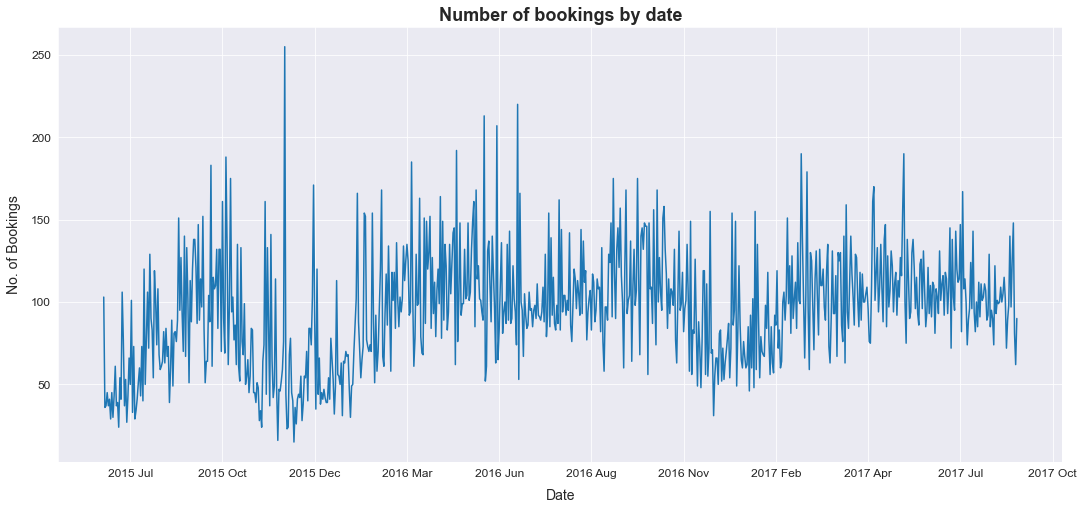

In [179]:
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
plt.figure(figsize=(18,8))
locator = mdates.MonthLocator()
fmt = mdates.DateFormatter('%Y %b')
sns.set_style("darkgrid")
g1 = sns.lineplot(x=done_df.groupby(['checkin_date']).size().index.values, y=done_df.groupby(['checkin_date']).size().values)
plt.xlabel(xlabel='Date', fontsize=14, labelpad=10)
plt.ylabel(ylabel='No. of Bookings', fontsize=14, labelpad=10)
X = plt.gca().xaxis
X.set_major_formatter(fmt)
X.set_major_locator(ticker.MaxNLocator(11))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
g1.set_title('Number of bookings by date', fontsize=18, fontweight='bold')
plt.show()

In [87]:
resort = done_df[done_df['hotel']=='Resort Hotel']
city = done_df[done_df['hotel']=='City Hotel']

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


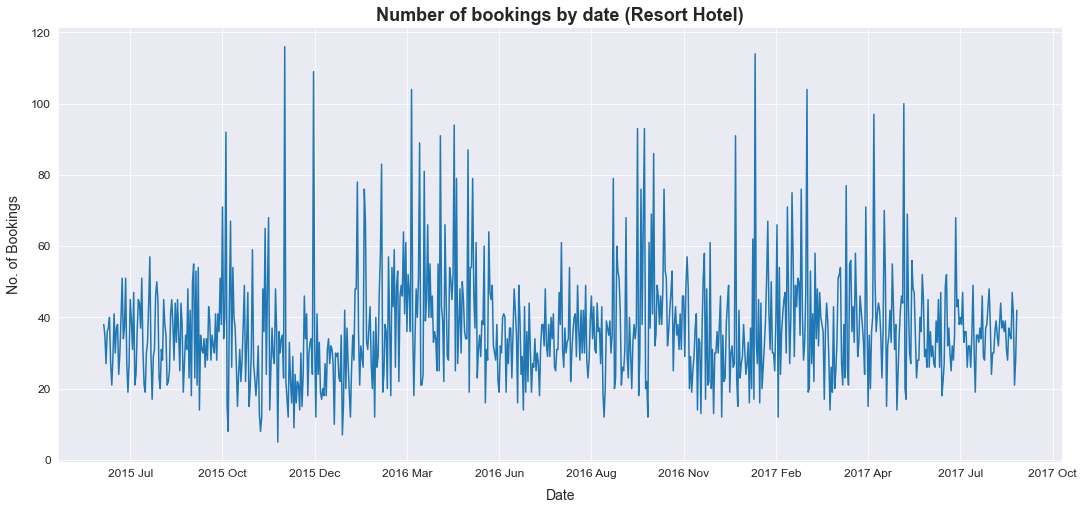

In [178]:
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
g2 = sns.lineplot(resort.groupby(['checkin_date']).size().index.values, resort.groupby(['checkin_date']).size().values)
plt.xlabel(xlabel='Date', fontsize=14, labelpad=10)
plt.ylabel(ylabel='No. of Bookings', fontsize=14, labelpad=10)
X = plt.gca().xaxis
X.set_major_formatter(fmt)
X.set_major_locator(ticker.MaxNLocator(11))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
g2.set_title('Number of bookings by date (Resort Hotel)', fontsize=18, fontweight='bold')
plt.show()

C:\Users\Brian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


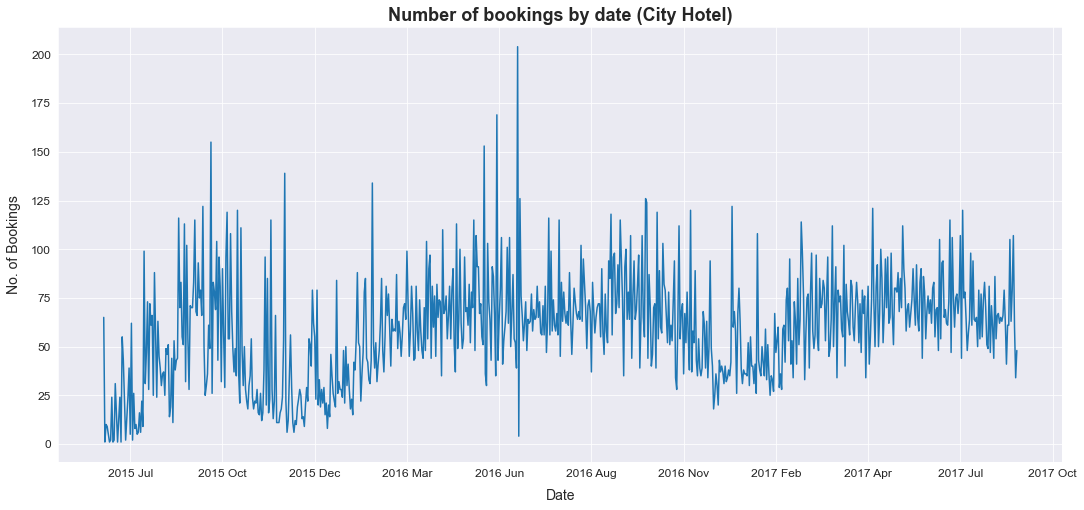

In [175]:
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
g3 = sns.lineplot(city.groupby(['checkin_date']).size().index.values, city.groupby(['checkin_date']).size().values)
plt.xlabel(xlabel='Date', fontsize=14, labelpad=10)
plt.ylabel(ylabel='No. of Bookings', fontsize=14, labelpad=10)
X = plt.gca().xaxis
X.set_major_formatter(fmt)
X.set_major_locator(ticker.MaxNLocator(11))
plt.yticks(fontsize=12)
plt.xticks(fontsize=12)
g3.set_title('Number of bookings by date (City Hotel)', fontsize=18, fontweight='bold')
plt.show()

In [130]:
top8 = merged_df.groupby(['Country']).count().sort_values('hotel', ascending=False)[:8][['hotel']]

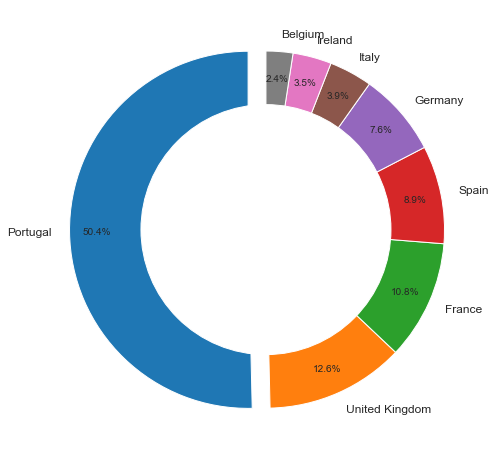

In [212]:
plt.figure(figsize=(8,10))
w,l,a = plt.pie(top8.hotel,
        labels=top8.index.values,
        radius=1,
        explode=(0.1,0,0,0,0,0,0,0),
        autopct=lambda p:f'{p:.1f}%', textprops={'fontsize': 10}, pctdistance=0.85,
        startangle=90,
        )
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.xticks(fontsize=12)
plt.setp(l, fontsize=12)
plt.show()